In [1]:
#importing libraries

import numpy as np
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import string
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading the data

df = pd.read_csv("/Users/HP/Desktop/spam2.csv")

# Visualization of the dataset

In [3]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.shape

(5572, 2)

In [7]:
#getting the columns names

df.columns

Index(['v1', 'v2'], dtype='object')

In [8]:
df.rename(columns = {"v1": "label", "v2": "text"}, inplace = True)

In [9]:
#recheck that column names has changed
df.columns

Index(['label', 'text'], dtype='object')

In [10]:
df.groupby('label').describe()

text                                                               
      count unique                                                top freq
label                                                                     
ham    4825   4516                             Sorry, I'll call later   30
spam    747    653  Please call our customer service representativ...    4

In [11]:
df.isnull().sum()

label    0
text     0
dtype: int64

In [13]:
df['Spam']=df['label'].apply(lambda x:1 if x=='spam' else 0)
df.head(5)

,label,text,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [14]:
#showing the new shape (number of rows and columns)

df.shape

(5572, 3)

In [15]:
df['length']=df['text'].apply(len)
df.head()

,label,text,Spam,length
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


<AxesSubplot:ylabel='Frequency'>

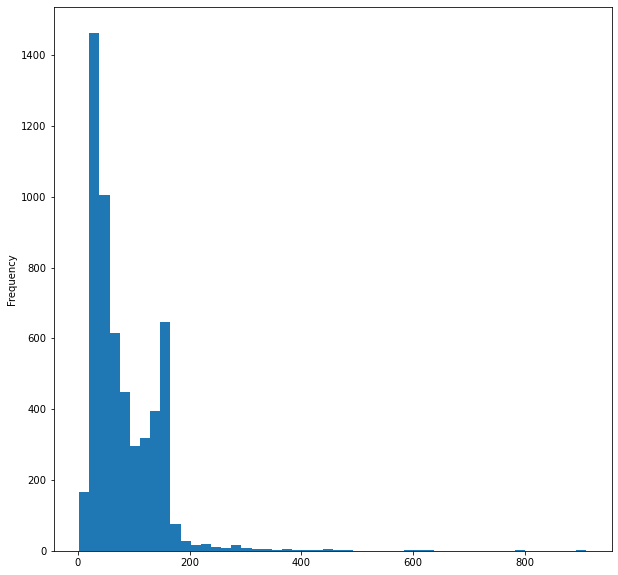

In [16]:
df['length'].plot(bins=50, kind='hist',figsize=(10,10))

array([<AxesSubplot:title={'center':'ham'}>,
       <AxesSubplot:title={'center':'spam'}>], dtype=object)

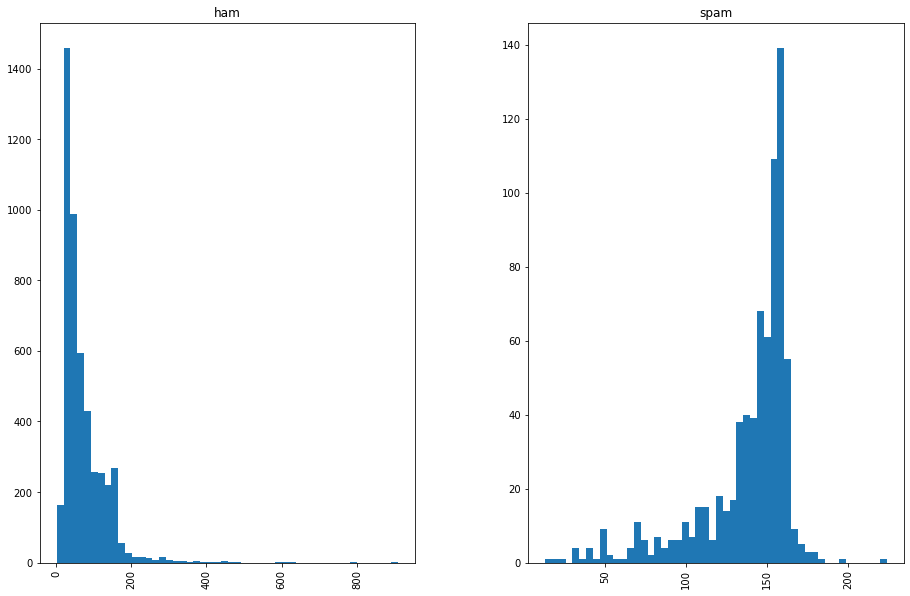

In [17]:
df.hist(column='length', by='label', bins=50, figsize=(15,10))

# Preprocessing and cleaning of data

In [18]:
for x in range(100):
    print(df['text'][x])
    print()

Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...

Ok lar... Joking wif u oni...

Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's

U dun say so early hor... U c already then say...

Nah I don't think he goes to usf, he lives around here though

FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv

Even my brother is not like to speak with me. They treat me like aids patent.

As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune

WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.

Had your mobile 11 months or more?

In [19]:
def decontact(phrase):
    # specific
    phrase = re.sub(r"won't", "will not", phrase)
    phrase = re.sub(r"can\'t", "can not", phrase)

    # general
    phrase = re.sub(r"\'ur", " your", phrase)
    phrase = re.sub(r"n\'t", " not", phrase)
    phrase = re.sub(r"\'re", " are", phrase)
    phrase = re.sub(r"\'s", " is", phrase)
    phrase = re.sub(r"\'d", " would", phrase)
    phrase = re.sub(r"\'ll", " will", phrase)
    phrase = re.sub(r"\'t", " not", phrase)
    phrase = re.sub(r"\'ve", " have", phrase)
    phrase = re.sub(r"\'m", " am", phrase)
    return phrase

In [20]:
df['text'].apply(decontact)
#CONVRTING EVERYTHING TO LOWERCASE
df['text']=df['text'].str.lower()
#REPLACING NEXT LINES BY 'WHITE SPACE'
df['text']=df['text'].str.replace(r'\n'," ") 
# REPLACING EMAIL IDs BY 'MAILID'
df['text']=df['text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','MailID')
# REPLACING URLs  BY 'Links'
df['text']=df['text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','Links')
# REPLACING CURRENCY SIGNS BY 'MONEY'
df['text']=df['text'].str.replace(r'£|\$', 'Money')
# REPLACING LARGE WHITE SPACE BY SINGLE WHITE SPACE
df['text']=df['text'].str.replace(r'\s+', ' ')

# REPLACING LEADING AND TRAILING WHITE SPACE BY SINGLE WHITE SPACE
df['text']=df['text'].str.replace(r'^\s+|\s+?$', '')
#REPLACING CONTACT NUMBERS
df['text']=df['text'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$','contact number')
#REPLACING SPECIAL CHARACTERS  BY WHITE SPACE 
df['text']=df['text'].str.replace(r"[^a-zA-Z0-9]+", " ")

C:\Users\HP\AppData\Local\Temp/ipykernel_12364/2791098601.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text']=df['text'].str.replace(r'\n'," ")
C:\Users\HP\AppData\Local\Temp/ipykernel_12364/2791098601.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text']=df['text'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$','MailID')
C:\Users\HP\AppData\Local\Temp/ipykernel_12364/2791098601.py:9: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text']=df['text'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$','Links')
C:\Users\HP\AppData\Local\Temp/ipykernel_12364/2791098601.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  df['text']=df['text'].str.replace(r'£|\$', 'Money')
C:\Users\HP\AppData\Local\Temp/ipykernel_12364/2791098601.py:13: FutureWarning: The default valu

In [21]:
df['text'] = df['text'].str.replace(" ur ", "")
df['text'] = df['text'].str.replace(" yr ", "")
df['text'] = df['text'].str.replace(" yor ", "")
df['text'] = df['text'].str.replace(" n ", " in ")
df['text'] = df['text'].str.replace(" u ", " you ")
df['text'] = df['text'].str.replace(" 2 ", " ")
df['text'] = df['text'].str.replace(" tkts ", " tickets ")
df['text'] = df['text'].str.replace(" dun ", " do not ")
df['text'] = df['text'].str.replace(" XxX ", "")
df['text'] = df['text'].str.replace(" £ ", " money ")
df['text'] = df['text'].str.replace(" r ", " are ")
df['text'] = df['text'].str.replace(" k ", " okay ")
df['text'] = df['text'].str.replace(" v ", " very ")
df['text'] = df['text'].str.replace(" b ", " be ")
df['text'] = df['text'].str.replace(" comin ", " coming ")
df['text'] = df['text'].str.replace(" aft ", " after ")
df['text'] = df['text'].str.replace(" str ", " staight ")
df['text'] = df['text'].str.replace(" ard ", "")
df['text'] = df['text'].str.replace(" tho ", "")
df['text'] = df['text'].str.replace(" &amp ", "")
df['text'] = df['text'].str.replace(" yup ", " yes ")
df['text'] = df['text'].str.replace(" pls ", " please ")
df['text'] = df['text'].str.replace(" congrats ", " congratulation ")
df['text'] = df['text'].str.replace(" 4 ", "")
df['text'] = df['text'].str.replace(" da ", " the ")
df['text'] = df['text'].str.replace(" wif "," with ")
df['text'] = df['text'].str.replace(" rply ", " reply ")
df['text'] = df['text'].str.replace(" frnds ", " friends ")
df['text'] = df['text'].str.replace(" urgnt ", " urgent ")
df['text'] = df['text'].str.replace(" gotta ", " going to ")
df['text'] = df['text'].str.replace(" wen ", " when ")
df['text'] = df['text'].str.replace(" wat ", " what ")
df['text'] = df['text'].str.replace(" abt ", " about ")
df['text'] = df['text'].str.replace(" prob ", " problem ")

In [22]:
for x in range(100):
    print(df['text'][x])
    print(" ")

go until jurong point crazy available only in bugis in great world la e buffet cine there got amore what 
 
ok lar joking with you oni 
 
free entry in a wkly comp to win fa cup final tickets 21st may 2005 text fa to 87121 to receive entry question std txt rate t c s apply 08452810075over18 s
 
u do not say so early hor you c already then say 
 
nah i don t think he goes to usf he lives around here though
 
freemsg hey there darling it s been 3 week s now and no word back i d like some fun you up for it still tb ok xxx std chgs to send Money1 50 to rcv
 
even my brother is not like to speak with me they treat me like aids patent 
 
as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press 9 to copy your friends callertune
 
winner as a valued network customer you have been selected to receivea Money900 prize reward to claim call 09061701461 claim code kl341 valid 12 hours only 
 
had your mobile 11 months or more you are en

In [88]:
nltk.download('stopwords')
ps = PorterStemmer()

def clean_text(text):
    #removing punctuation
    remover = [char for char in text if char not in string.punctuation]
    remover = "".join(remover)
    #removing stopwords and stemming
    removestop = [word for word in remover.split() if word.lower() not in stopwords.words('english')]
    removestop = " ".join(removestop)
    removestop = [ps.stem(word) for word in removestop.split() if not word.lower() in stopwords.words('english')]
    #returning a list of clean words
    return removestop

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# a sample of tokenized words

df['text'].head().apply(clean_text)

0    [go, jurong, point, crazi, avail, bugi, great,...
1                                 [ok, lar, joke, oni]
2    [free, entri, wkli, comp, win, fa, cup, final,...
3                [u, say, earli, hor, c, alreadi, say]
4         [nah, think, goe, usf, live, around, though]
Name: text, dtype: object

In [25]:
#converting the text to a matrix of tokens

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer = clean_text, max_features = 3000)
messages_count = cv.fit_transform(df['text'])


In [26]:
print(cv.get_feature_names())
print(messages_count.toarray())

['0', '00', '000', '02', '0207', '03', '04', '05', '06', '07xxxxxxxxx', '0800', '08000407165', '08000776320', '08000839402', '08000930705', '08000938767', '08001950382', '08002888812', '08002986030', '08002986906', '08006344447', '0808', '08081560665', '0825', '0844', '0845', '08452810073', '0870', '08701417012', '08701417012150p', '08702840625', '08707509020', '0871', '08712300220', '08712405020', '08712460324', '08715705022', '08717898035', '08718720201', '087187262701', '08718727870', '09', '09050002311', '09050003091', '09050090044', '09056242159', '09058091854', '09058094565', '09058094597', '09058094599', '09058099801', '09061209465', '09061213237', '09061221061', '09061221066', '09061701461', '09061702893', '09061743386', '09061743806', '09061744553', '09061790121', '09063458130', '09064011000', '09064012160', '09064019014', '09065171142', '09065174042', '09065989182', '09066350750', '09066358152', '09066362231', '09066364311', '09066364589', '09066380611', '09066382422', '09066

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [27]:
#getting shape of messages_count

messages_count.shape

(5572, 3000)

In [28]:
from sklearn.feature_extraction.text import TfidfTransformer
tft = TfidfTransformer()

messages1 = tft.fit_transform(messages_count)
messages1.shape

(5572, 3000)

## Splitting training and testing datasets + solving the imbalanced data

In [100]:
#splitting the data into 80% traning and 20% testing
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(messages1,df['Spam'],test_size = 0.2,random_state = 42)

In [101]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)
print('Before upsampling count of label 0 {}'.format(sum(y_train==0)))
print('Before upsampling count of label 1 {}'.format(sum(y_train==1)))
print('Before upsampling count of label 0 {}'.format(sum(y_test==0)))
print('Before upsampling count of label 1 {}'.format(sum(y_test==1)))

(4457, 3000)
(1115, 3000)
(4457,)
(1115,)
Before upsampling count of label 0 3860
Before upsampling count of label 1 597
Before upsampling count of label 0 965
Before upsampling count of label 1 150


In [102]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy = 1, random_state = 42)
x_train_s , y_train_s = sm.fit_resample(x_train,y_train.values.ravel())
x_test_s , y_test_s = sm.fit_resample(x_test,y_test.values.ravel())

In [103]:
print('After upsampling count of label 0 {}'.format(sum(y_train_s==0)))
print('After upsampling count of label 1 {}'.format(sum(y_train_s==1)))
print('After upsampling count of label 0 {}'.format(sum(y_test_s==0)))
print('After upsampling count of label 1 {}'.format(sum(y_test_s==1)))

After upsampling count of label 0 3860
After upsampling count of label 1 3860
After upsampling count of label 0 965
After upsampling count of label 1 965


In [104]:
#libraries needed too
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, plot_roc_curve
from sklearn.model_selection import cross_val_score
from statistics import mean
pred_scores = []


# 1- Naive Bayes

Naive Bayes scores [0.97020725 0.9753886  0.9753886  0.98316062 0.98963731 0.98704663
 0.9857513  0.98316062 0.98445596 0.98186528]
mean of scores 0.9816062176165803
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3860
           1       0.98      0.99      0.99      3860

    accuracy                           0.99      7720
   macro avg       0.99      0.99      0.99      7720
weighted avg       0.99      0.99      0.99      7720

confusion matrix: 
 [[3802   58]
 [  54 3806]]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

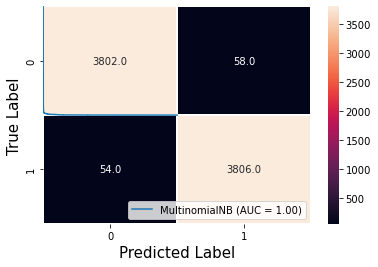

In [105]:
#create and train the naive bayes classifier

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
model_naive = nb.fit( x_train_s, y_train_s)
scores = cross_val_score(nb, x_train_s, y_train_s,cv=10, n_jobs=-1)
print("Naive Bayes scores % s" % scores)
print("mean of scores % s" % (mean(scores)))

#evaluating the model on training dataset

pred = model_naive.predict(x_train_s)
print(classification_report(y_train_s, pred))
plot_roc_curve(nb,x_train_s,y_train_s)
#---#
confmatrix = confusion_matrix(y_train_s, pred)
print('confusion matrix: \n', confmatrix)
sns.heatmap(confmatrix,annot=True,fmt=".1f",linewidths=1.5)
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15)
plt.show


In [106]:
print('accuracy: ', accuracy_score(y_train_s, pred))
print('Naive Bayes recall score:= {}'.format(recall_score(y_train_s, pred, average='binary')))

accuracy:  0.9854922279792746
Naive Bayes recall score:= 0.9860103626943005


In [107]:
#### now on the test data ##########

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       965
           1       0.97      0.97      0.97       965

    accuracy                           0.97      1930
   macro avg       0.97      0.97      0.97      1930
weighted avg       0.97      0.97      0.97      1930

confusion matrix: 
 [[939  26]
 [ 25 940]]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

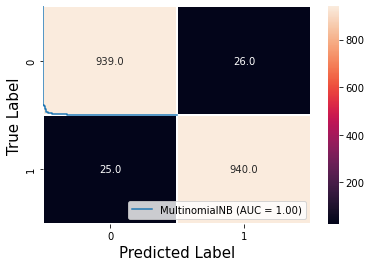

In [108]:
#evaluating the model on test dataset

pred = model_naive.predict(x_test_s)
print(classification_report(y_test_s, pred))
plot_roc_curve(nb, x_test_s, y_test_s)
#--#
confmatrix = confusion_matrix(y_test_s, pred)
print('confusion matrix: \n', confmatrix)
sns.heatmap(confmatrix,annot=True,fmt=".1f",linewidths=1.5)
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15)
plt.show

In [109]:
print('accuracy: ', accuracy_score(y_test_s, pred))
print('Naive Bayes recall score:= {}'.format(recall_score(y_test_s, pred, average='binary')))
pred_scores.append(('Naive Bayes', recall_score(y_test_s, pred)))

accuracy:  0.9735751295336788
Naive Bayes recall score:= 0.9740932642487047


# 2- KNN

KNN scores [0.98963731 0.99352332 0.99740933 0.99481865 0.99870466 0.99740933
 0.99481865 0.99611399 0.99352332 0.99093264]
mean of scores 0.9946891191709845
[0 1 0 ... 1 1 1]
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      3860
           1       0.99      1.00      1.00      3860

    accuracy                           1.00      7720
   macro avg       1.00      1.00      1.00      7720
weighted avg       1.00      1.00      1.00      7720



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


confusion matrix: 
 [[3839   21]
 [   4 3856]]


<function matplotlib.pyplot.show(close=None, block=None)>

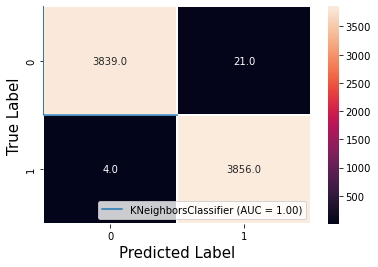

In [110]:
#create and train the KNN classifier

from sklearn.neighbors import KNeighborsClassifier
KM = KNeighborsClassifier(n_neighbors=5, n_jobs = 1)
model_k = KM.fit( x_train_s, y_train_s)
scores = cross_val_score(KM, x_train_s, y_train_s,cv=10, n_jobs=-1)
print("KNN scores % s" % scores)
print("mean of scores % s" % (mean(scores)))

#evaluating the model on training dataset

pred = model_k.predict(x_train_s)
print(pred)
print(classification_report(y_train_s, pred))
plot_roc_curve(KM,x_train_s,y_train_s)
#---#
confmatrix = confusion_matrix(y_train_s, pred)
print('confusion matrix: \n', confmatrix)
sns.heatmap(confmatrix,annot=True,fmt=".1f",linewidths=1.5)
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15)
plt.show

In [111]:
print('accuracy: ', accuracy_score(y_train_s, pred))
print('KNN recall score:= {}'.format(recall_score(y_train_s, pred, average='binary')))

accuracy:  0.9967616580310881
KNN recall score:= 0.9989637305699481


In [112]:
#----now on test data----#

              precision    recall  f1-score   support

           0       0.81      0.99      0.89       965
           1       0.99      0.77      0.87       965

    accuracy                           0.88      1930
   macro avg       0.90      0.88      0.88      1930
weighted avg       0.90      0.88      0.88      1930



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


confusion matrix: 
 [[960   5]
 [223 742]]


<function matplotlib.pyplot.show(close=None, block=None)>

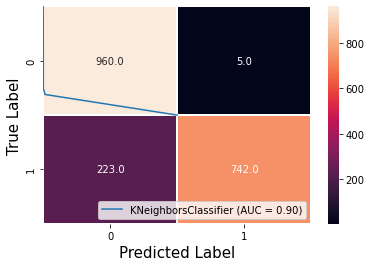

In [113]:
#evaluating the model on test dataset

pred = model_k.predict(x_test_s)
print(classification_report(y_test_s, pred))
plot_roc_curve(KM, x_test_s, y_test_s)
#--#
confmatrix = confusion_matrix(y_test_s, pred)
print('confusion matrix: \n', confmatrix)
sns.heatmap(confmatrix,annot=True,fmt=".1f",linewidths=1.5)
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15)
plt.show

In [114]:
print('accuracy: ', accuracy_score(y_test_s, pred))
print('KNN recall score:= {}'.format(recall_score(y_test_s, pred, average='binary')))
pred_scores.append(('KNN', recall_score(y_test_s, pred)))

accuracy:  0.8818652849740932
KNN recall score:= 0.7689119170984456


# 3- Support Vector Machine

SVM scores [0.99740933 0.99481865 0.99870466 1.         1.         0.99740933
 1.         1.         0.99870466 1.        ]
mean of scores 0.9987046632124352
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3860
           1       1.00      1.00      1.00      3860

    accuracy                           1.00      7720
   macro avg       1.00      1.00      1.00      7720
weighted avg       1.00      1.00      1.00      7720



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


confusion matrix: 
 [[3859    1]
 [   0 3860]]


<function matplotlib.pyplot.show(close=None, block=None)>

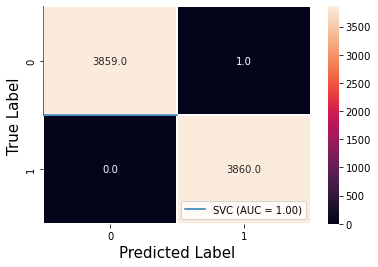

In [115]:
#create and train the SVM classifier

from sklearn.svm import SVC
SVMm = SVC(kernel='rbf', decision_function_shape='ovr', random_state = 42)
model_SVM = SVMm.fit( x_train_s, y_train_s)
scores = cross_val_score(SVMm, x_train_s, y_train_s,cv=10, n_jobs=-1)
print("SVM scores % s" % scores)
print("mean of scores % s" % (mean(scores)))
#evaluating the model on training dataset

pred = model_SVM.predict(x_train_s)
print(classification_report(y_train_s, pred))
plot_roc_curve(SVMm,x_train_s,y_train_s)
#---#
confmatrix = confusion_matrix(y_train_s, pred)
print('confusion matrix: \n', confmatrix)
sns.heatmap(confmatrix,annot=True,fmt=".1f",linewidths=1.5)
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15)
plt.show

In [116]:
print('accuracy: ', accuracy_score(y_train_s, pred))
print('SVM recall score:= {}'.format(recall_score(y_train_s, pred, average='binary')))

accuracy:  0.9998704663212435
SVM recall score:= 1.0


In [117]:
#---now on test data---#

              precision    recall  f1-score   support

           0       0.93      1.00      0.96       965
           1       1.00      0.93      0.96       965

    accuracy                           0.96      1930
   macro avg       0.97      0.96      0.96      1930
weighted avg       0.97      0.96      0.96      1930



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


confusion matrix: 
 [[963   2]
 [ 70 895]]


<function matplotlib.pyplot.show(close=None, block=None)>

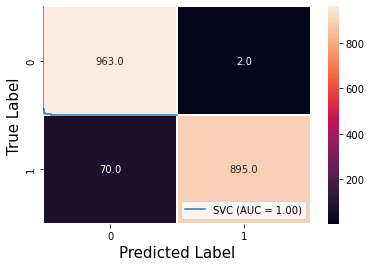

In [118]:
#evaluating the model on test dataset

pred = model_SVM.predict(x_test_s)
print(classification_report(y_test_s, pred))
plot_roc_curve(SVMm, x_test_s, y_test_s)
#--#
confmatrix = confusion_matrix(y_test_s, pred)
print('confusion matrix: \n', confmatrix)
sns.heatmap(confmatrix,annot=True,fmt=".1f",linewidths=1.5)
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15)
plt.show

In [119]:
print('accuracy: ', accuracy_score(y_test_s, pred))
print('SVM recall score:= {}'.format(recall_score(y_test_s, pred, average='binary')))
pred_scores.append(('SVM', recall_score(y_test_s, pred)))

accuracy:  0.9626943005181348
SVM recall score:= 0.927461139896373


# 4- Random Forest

Random Forest scores [0.97927461 0.98056995 0.99740933 0.99611399 1.         0.99611399
 1.         1.         0.99611399 0.99870466]
mean of scores 0.9944300518134715
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3860
           1       1.00      1.00      1.00      3860

    accuracy                           1.00      7720
   macro avg       1.00      1.00      1.00      7720
weighted avg       1.00      1.00      1.00      7720



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


confusion matrix: 
 [[3860    0]
 [   1 3859]]


<function matplotlib.pyplot.show(close=None, block=None)>

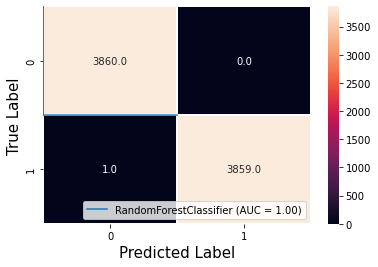

In [120]:
#create and train the Random Forest classifier

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=50, random_state= 42)
model_rf = rfc.fit( x_train_s, y_train_s)
scores = cross_val_score(rfc, x_train_s, y_train_s,cv=10, n_jobs=-1)
print("Random Forest scores % s" % scores)
print("mean of scores % s" % (mean(scores)))

#evaluating the model on training dataset

pred = model_rf.predict(x_train_s)
print(classification_report(y_train_s, pred))
plot_roc_curve(rfc,x_train_s,y_train_s)
#---#
confmatrix = confusion_matrix(y_train_s, pred)
print('confusion matrix: \n', confmatrix)
sns.heatmap(confmatrix,annot=True,fmt=".1f",linewidths=1.5)
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15)
plt.show

In [121]:
print('accuracy: ', accuracy_score(y_train_s, pred))
print('Random Forest recall score:= {}'.format(recall_score(y_train_s, pred, average='binary')))

accuracy:  0.9998704663212435
Random Forest recall score:= 0.9997409326424871


In [122]:
#---now on test data---#

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       965
           1       1.00      0.97      0.98       965

    accuracy                           0.98      1930
   macro avg       0.98      0.98      0.98      1930
weighted avg       0.98      0.98      0.98      1930

confusion matrix: 
 [[963   2]
 [ 30 935]]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

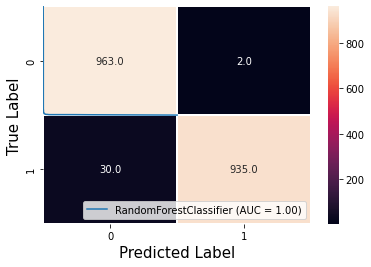

In [123]:
#evaluating the model on test dataset

pred = model_rf.predict(x_test_s)
print(classification_report(y_test_s, pred))
plot_roc_curve(rfc, x_test_s, y_test_s)
#--#
confmatrix = confusion_matrix(y_test_s, pred)
print('confusion matrix: \n', confmatrix)
sns.heatmap(confmatrix,annot=True,fmt=".1f",linewidths=1.5)
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15)
plt.show

In [124]:
print('accuracy: ', accuracy_score(y_test_s, pred))
print('Random Forest recall score:= {}'.format(recall_score(y_test_s, pred, average='binary')))
pred_scores.append(('Random Forest', recall_score(y_test_s, pred)))

accuracy:  0.983419689119171
Random Forest recall score:= 0.9689119170984456


# 5- Decision Tree

Decision Tree scores [0.92357513 0.93911917 0.97797927 0.97797927 0.98445596 0.97020725
 0.98834197 0.97279793 0.98186528 0.98056995]
mean of scores 0.9696891191709844
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3860
           1       1.00      0.99      0.99      3860

    accuracy                           0.99      7720
   macro avg       0.99      0.99      0.99      7720
weighted avg       0.99      0.99      0.99      7720

confusion matrix: 
 [[3856    4]
 [  56 3804]]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

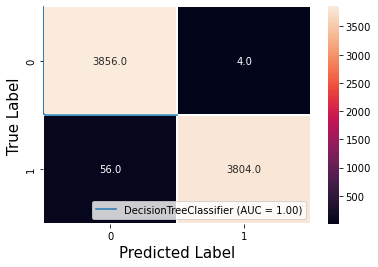

In [125]:
#create and train the Decision Tree classifier

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=42,min_samples_leaf = 2)
model_dt = dtc.fit( x_train_s, y_train_s)
scores = cross_val_score(dtc, x_train_s, y_train_s,cv=10, n_jobs=-1)
print("Decision Tree scores % s" % scores)
print("mean of scores % s" % (mean(scores)))

#evaluating the model on training dataset

pred = model_dt.predict(x_train_s)
print(classification_report(y_train_s, pred))
plot_roc_curve(dtc,x_train_s,y_train_s)
#---#
confmatrix = confusion_matrix(y_train_s, pred)
print('confusion matrix: \n', confmatrix)
sns.heatmap(confmatrix,annot=True,fmt=".1f",linewidths=1.5)
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15)
plt.show

In [126]:
print('accuracy: ', accuracy_score(y_train_s, pred))
print('Decision Tree recall score:= {}'.format(recall_score(y_train_s, pred, average='binary')))

accuracy:  0.9922279792746114
Decision Tree recall score:= 0.9854922279792746


In [127]:
#---now on test data---#

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       965
           1       0.98      0.94      0.96       965

    accuracy                           0.96      1930
   macro avg       0.96      0.96      0.96      1930
weighted avg       0.96      0.96      0.96      1930

confusion matrix: 
 [[942  23]
 [ 62 903]]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

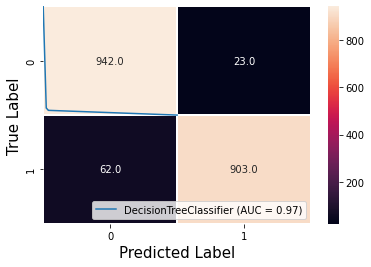

In [128]:
#evaluating the model on test dataset

pred = model_dt.predict(x_test_s)
print(classification_report(y_test_s, pred))
plot_roc_curve(dtc, x_test_s, y_test_s)
#--#
confmatrix = confusion_matrix(y_test_s, pred)
print('confusion matrix: \n', confmatrix)
sns.heatmap(confmatrix,annot=True,fmt=".1f",linewidths=1.5)
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15)
plt.show

In [129]:
print('accuracy: ', accuracy_score(y_test_s, pred))
print('Decision Tree recall score:= {}'.format(recall_score(y_test_s, pred, average='binary')))
pred_scores.append(('Decision Tree', recall_score(y_test_s, pred)))

accuracy:  0.9559585492227979
Decision Tree recall score:= 0.9357512953367876


# 6- Logistic Regression

Logistic Reg scores [0.9611399  0.97279793 0.98704663 0.98445596 0.99481865 0.97797927
 0.9857513  0.98316062 0.98316062 0.98704663]
mean of scores 0.9817357512953367
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3860
           1       0.99      0.99      0.99      3860

    accuracy                           0.99      7720
   macro avg       0.99      0.99      0.99      7720
weighted avg       0.99      0.99      0.99      7720

confusion matrix: 
 [[3825   35]
 [  54 3806]]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

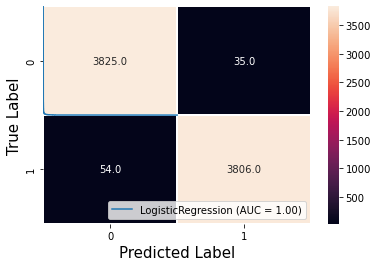

In [130]:
#create and train the LR classifier

from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(solver='liblinear', penalty='l1', random_state = 42)
model_lr = lrc.fit( x_train_s, y_train_s)
scores = cross_val_score(lrc, x_train_s, y_train_s,cv=10, n_jobs=-1)
print("Logistic Reg scores % s" % scores)
print("mean of scores % s" % (mean(scores)))

#evaluating the model on training dataset

pred = model_lr.predict(x_train_s)
print(classification_report(y_train_s, pred))
plot_roc_curve(lrc,x_train_s,y_train_s)
#---#
confmatrix = confusion_matrix(y_train_s, pred)
print('confusion matrix: \n', confmatrix)
sns.heatmap(confmatrix,annot=True,fmt=".1f",linewidths=1.5)
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15)
plt.show

In [131]:
print('accuracy: ', accuracy_score(y_train_s, pred))
print('Logistic Regression recall score:= {}'.format(recall_score(y_train_s, pred, average='binary')))

accuracy:  0.9884715025906736
Logistic Regression recall score:= 0.9860103626943005


In [132]:
#---now on test data---#

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       965
           1       0.98      0.93      0.96       965

    accuracy                           0.96      1930
   macro avg       0.96      0.96      0.96      1930
weighted avg       0.96      0.96      0.96      1930

confusion matrix: 
 [[947  18]
 [ 64 901]]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

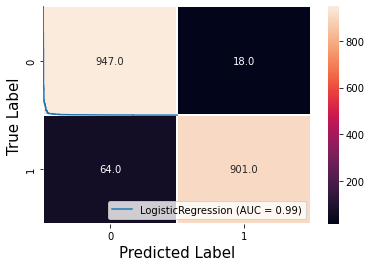

In [133]:
#evaluating the model on test dataset

pred = model_lr.predict(x_test_s)
print(classification_report(y_test_s, pred))
plot_roc_curve(lrc, x_test_s, y_test_s)
#--#
confmatrix = confusion_matrix(y_test_s, pred)
print('confusion matrix: \n', confmatrix)
sns.heatmap(confmatrix,annot=True,fmt=".1f",linewidths=1.5)
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15)
plt.show

In [134]:
print('accuracy: ', accuracy_score(y_test_s, pred))
print('Logistic Regression recall score:= {}'.format(recall_score(y_test_s, pred, average='binary')))
pred_scores.append(('Logistic Reg.', recall_score(y_test_s, pred)))

accuracy:  0.9575129533678757
Logistic Regression recall score:= 0.933678756476684


# 7- Adaboost

Adaboost scores [0.94430052 0.95725389 0.9857513  0.99093264 0.99352332 0.98445596
 0.99352332 0.99481865 0.98704663 0.99093264]
mean of scores 0.9822538860103627
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3860
           1       0.99      0.98      0.99      3860

    accuracy                           0.99      7720
   macro avg       0.99      0.99      0.99      7720
weighted avg       0.99      0.99      0.99      7720

confusion matrix: 
 [[3823   37]
 [  72 3788]]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

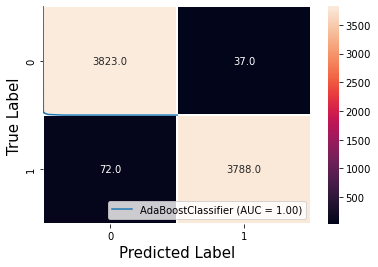

In [135]:
#create and train the LR classifier

from sklearn.ensemble import AdaBoostClassifier
adc = AdaBoostClassifier(n_estimators=50, random_state = 42)
model_ada = adc.fit( x_train_s, y_train_s)
scores = cross_val_score(adc, x_train_s, y_train_s,cv=10, n_jobs=-1)
print("Adaboost scores % s" % scores)
print("mean of scores % s" % (mean(scores)))

#evaluating the model on training dataset

pred = model_ada.predict(x_train_s)
print(classification_report(y_train_s, pred))
plot_roc_curve(adc,x_train_s,y_train_s)
#---#
confmatrix = confusion_matrix(y_train_s, pred)
print('confusion matrix: \n', confmatrix)
sns.heatmap(confmatrix,annot=True,fmt=".1f",linewidths=1.5)
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15)
plt.show

In [136]:
print('accuracy: ', accuracy_score(y_train_s, pred))
print('Adaboost recall score:= {}'.format(recall_score(y_train_s, pred, average='binary')))

accuracy:  0.9858808290155441
Adaboost recall score:= 0.9813471502590674


In [137]:
#--- now on test data---#

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       965
           1       0.99      0.96      0.97       965

    accuracy                           0.97      1930
   macro avg       0.97      0.97      0.97      1930
weighted avg       0.97      0.97      0.97      1930

confusion matrix: 
 [[952  13]
 [ 43 922]]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

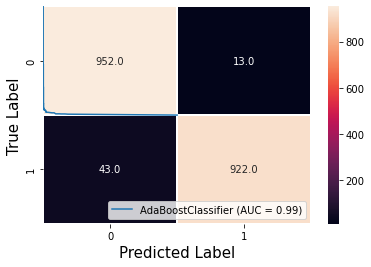

In [138]:
#evaluating the model on test dataset

pred = model_ada.predict(x_test_s)
print(classification_report(y_test_s, pred))
plot_roc_curve(adc, x_test_s, y_test_s)
#--#
confmatrix = confusion_matrix(y_test_s, pred)
print('confusion matrix: \n', confmatrix)
sns.heatmap(confmatrix,annot=True,fmt=".1f",linewidths=1.5)
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15)
plt.show

In [139]:
print('accuracy: ', accuracy_score(y_test_s, pred))
print('Adaboost recall score:= {}'.format(recall_score(y_test_s, pred, average='binary')))
pred_scores.append(('AdaBoost', recall_score(y_test_s, pred)))

accuracy:  0.9709844559585492
Adaboost recall score:= 0.9554404145077721


# 8- Bagging

Bagging scores [0.95466321 0.9611399  0.98056995 0.98445596 0.98704663 0.97927461
 0.98834197 0.97797927 0.9857513  0.98445596]
mean of scores 0.9783678756476684
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3860
           1       1.00      1.00      1.00      3860

    accuracy                           1.00      7720
   macro avg       1.00      1.00      1.00      7720
weighted avg       1.00      1.00      1.00      7720



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


confusion matrix: 
 [[3860    0]
 [   1 3859]]


<function matplotlib.pyplot.show(close=None, block=None)>

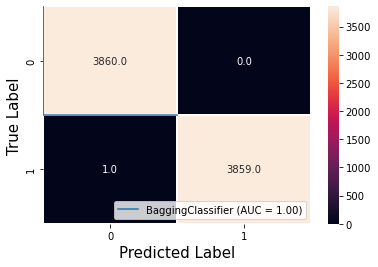

In [140]:
#create and train the bagging classifier

from sklearn.ensemble import BaggingClassifier
bgc = BaggingClassifier(n_estimators=50, random_state = 42)
model_bc = bgc.fit( x_train_s, y_train_s)
scores = cross_val_score(bgc, x_train_s, y_train_s,cv=10, n_jobs=-1)
print("Bagging scores % s" % scores)
print("mean of scores % s" % (mean(scores)))

#evaluating the model on training dataset

pred = model_bc.predict(x_train_s)
print(classification_report(y_train_s, pred))
plot_roc_curve(bgc,x_train_s,y_train_s)
#---#
confmatrix = confusion_matrix(y_train_s, pred)
print('confusion matrix: \n', confmatrix)
sns.heatmap(confmatrix,annot=True,fmt=".1f",linewidths=1.5)
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15)
plt.show

In [141]:
print('accuracy: ', accuracy_score(y_train_s, pred))
print('bagging recall score:= {}'.format(recall_score(y_train_s, pred, average='binary')))

accuracy:  0.9998704663212435
bagging recall score:= 0.9997409326424871


In [142]:
#---now on test data---#

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       965
           1       0.98      0.97      0.97       965

    accuracy                           0.97      1930
   macro avg       0.97      0.97      0.97      1930
weighted avg       0.97      0.97      0.97      1930

confusion matrix: 
 [[942  23]
 [ 30 935]]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

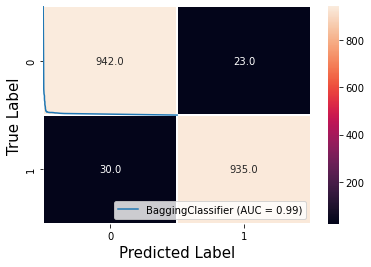

In [143]:
#evaluating the model on test dataset

pred = model_bc.predict(x_test_s)
print(classification_report(y_test_s, pred))
plot_roc_curve(bgc, x_test_s, y_test_s)
#--#
confmatrix = confusion_matrix(y_test_s, pred)
print('confusion matrix: \n', confmatrix)
sns.heatmap(confmatrix,annot=True,fmt=".1f",linewidths=1.5)
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15)
plt.show

In [144]:
print('accuracy: ', accuracy_score(y_test_s, pred))
print('bagging recall score:= {}'.format(recall_score(y_test_s, pred, average='binary')))
pred_scores.append(('Bagging', recall_score(y_test_s, pred)))

accuracy:  0.9725388601036269
bagging recall score:= 0.9689119170984456


# 9- Extra Trees

Extra Trees scores [0.98963731 0.98963731 0.99611399 1.         0.99870466 1.
 1.         0.99740933 0.99740933 1.        ]
mean of scores 0.9968911917098445
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3860
           1       1.00      1.00      1.00      3860

    accuracy                           1.00      7720
   macro avg       1.00      1.00      1.00      7720
weighted avg       1.00      1.00      1.00      7720



C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


confusion matrix: 
 [[3860    0]
 [   1 3859]]


<function matplotlib.pyplot.show(close=None, block=None)>

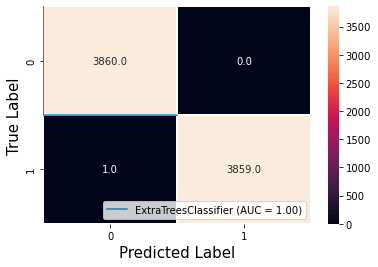

In [146]:
#create and train the Extra Trees classifier

from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier(n_estimators=50, random_state=111)
model_et = etc.fit( x_train_s, y_train_s)
scores = cross_val_score(etc, x_train_s, y_train_s,cv=10, n_jobs=-1)
print("Extra Trees scores % s" % scores)
print("mean of scores % s" % (mean(scores)))

#evaluating the model on training dataset

pred = model_et.predict(x_train_s)
print(classification_report(y_train_s, pred))
plot_roc_curve(etc,x_train_s,y_train_s)
#---#
confmatrix = confusion_matrix(y_train_s, pred)
print('confusion matrix: \n', confmatrix)
sns.heatmap(confmatrix,annot=True,fmt=".1f",linewidths=1.5)
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15)
plt.show

In [147]:
print('accuracy: ', accuracy_score(y_train_s, pred))
print('Extra Trees recall score:= {}'.format(recall_score(y_train_s, pred, average='binary')))

accuracy:  0.9998704663212435
Extra Trees recall score:= 0.9997409326424871


In [148]:
#---now on test data---#

              precision    recall  f1-score   support

           0       0.97      0.98      0.97       965
           1       0.98      0.97      0.97       965

    accuracy                           0.97      1930
   macro avg       0.97      0.97      0.97      1930
weighted avg       0.97      0.97      0.97      1930

confusion matrix: 
 [[942  23]
 [ 30 935]]


C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<function matplotlib.pyplot.show(close=None, block=None)>

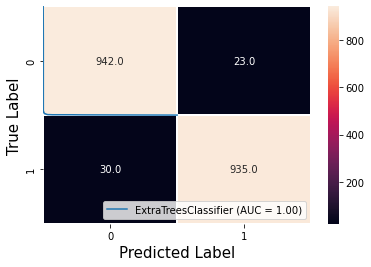

In [149]:
#evaluating the model on test dataset

pred = model_bc.predict(x_test_s)
print(classification_report(y_test_s, pred))
plot_roc_curve(etc, x_test_s, y_test_s)
#--#
confmatrix = confusion_matrix(y_test_s, pred)
print('confusion matrix: \n', confmatrix)
sns.heatmap(confmatrix,annot=True,fmt=".1f",linewidths=1.5)
plt.xlabel('Predicted Label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True Label', fontsize = 15)
plt.show

In [150]:
print('accuracy: ', accuracy_score(y_test_s, pred))
print('Extra Trees recall score:= {}'.format(recall_score(y_test_s, pred, average='binary')))
pred_scores.append(('Extra Trees', recall_score(y_test_s, pred)))

accuracy:  0.9725388601036269
Extra Trees recall score:= 0.9689119170984456


# Comparing Recall scores

In [151]:
df1 = pd.DataFrame(pred_scores, columns=["Algorithm","Recall Scores"])

In [152]:
print(df1)

       Algorithm  Recall Scores
0    Naive Bayes       0.974093
1            KNN       0.768912
2            SVM       0.927461
3  Random Forest       0.968912
4  Decision Tree       0.935751
5  Logistic Reg.       0.933679
6       AdaBoost       0.955440
7        Bagging       0.968912
8    Extra Trees       0.968912


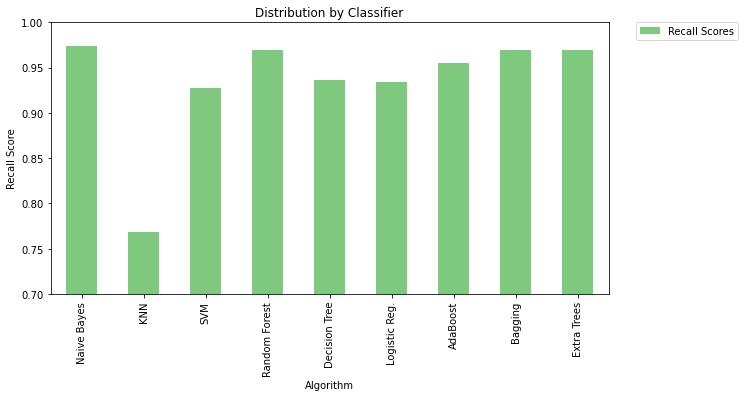

In [161]:
import matplotlib.pyplot as plt
df1.plot( x= "Algorithm", y = "Recall Scores",kind = "bar", figsize=(10,5), colormap="Accent", ylim=(0.7,1.0))
plt.ylabel('Recall Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()